<a href="https://colab.research.google.com/github/valentinmakarov/makarovvalentin/blob/main/first_hw_makarov_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург
(c) В.И. Фирсанова
```

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Домашнее задание

[Efficient Estimation of Word Representations in
Vector Space (Mikolov et al., 2013)](https://arxiv.org/pdf/1301.3781.pdf)

### **Задача 1.** Обучаем эмбеддинги с Gensim

Что такое Gensim?

* библиотека Python с открытым исходным кодом
* области применения:
  * извлечение информации
  * обработка естественного языка
* задачи:
  * тематическое моделирование
  * индексирование документов
  * поиск сходства

При использовании любой библиотеки, нужно использовать ее [документацию](https://radimrehurek.com/gensim/index.html)

Загрузим корпус текстов Шекспира напрямую из GitHub с помощью команды shell `wget`

In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 18:44:35--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.07s   

2024-01-28 18:44:36 (15.8 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [3]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

Pre-processing / предобработка с помощью регулярных выражений и токенизатора NLTK

In [4]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt') # ресурс для токенизации
nltk.download('wordnet') # ресурс для лемматизации
nltk.download('stopwords') # ресурс для извлечения списка стоп-слов


#загрузим список стоп-слов для английского языка
stop_words = set(stopwords.words('english'))


# токенизация по словам
tokens = word_tokenize(cleaned_text)

#удалим стоп-слова
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

#лемматизируем
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# выведем на экран несколько токенов
print(tokens[:10])
print(lemmatized_text[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['first', 'citizen', 'before', 'we', 'proceed', 'any', 'further', 'hear', 'me', 'speak']
['first', 'citizen', 'proceed', 'hear', 'speak', 'speak', 'speak', 'first', 'citizen', 'resolved']


Обучение

`sentences` - итерируемый объект; список токенов либо список списков токенов (токенизированных предложений)

`vector_size` - размерность вектора

`window` - размер контекстного окна

`min_count` - если слово встречается реже, оно не попадает в нашу модель

`workers` - потоки (распараллеливание для ускорение работы)

In [7]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
model = Word2Vec(sentences=[lemmatized_text], vector_size=100, window=4, min_count=2, workers=4)

In [8]:
# выведем результат обучения модели
model.wv['king']

array([-6.5379951e-05,  3.3214658e-03, -6.7621791e-03, -1.2351963e-03,
        7.6156743e-03,  7.2365338e-03, -3.5377820e-03,  3.1583274e-03,
       -8.5588321e-03,  6.0070278e-03, -4.8749521e-03, -3.4197853e-03,
        9.4713075e-03,  8.9710462e-04,  7.5748302e-03, -6.2052603e-03,
        5.0813179e-03,  9.7915456e-03, -8.1954757e-03, -5.2643982e-03,
       -6.9486969e-03, -4.8953206e-03, -3.6774783e-03, -8.5565988e-03,
        7.8230398e-03, -4.8064054e-03,  8.4064258e-03,  5.0521409e-03,
       -6.7165047e-03,  4.0311567e-03,  5.7381936e-03, -7.3674256e-03,
       -7.3221633e-03, -2.5396331e-03, -8.6484989e-03, -1.4808251e-03,
       -2.7720392e-04,  3.1431043e-03,  1.2564171e-03, -1.2460360e-03,
       -5.6233578e-03,  1.5324609e-03, -9.2647772e-04,  6.8662288e-03,
        3.9410568e-03,  4.4444958e-03,  1.2333655e-03, -2.6619523e-03,
       -4.2701331e-03, -1.0331146e-03,  1.4755962e-03, -2.5100298e-03,
       -7.0975758e-03, -7.7550896e-03, -9.3059810e-03, -6.0468423e-03,
      

### **Задача 2.** Считаем сходство

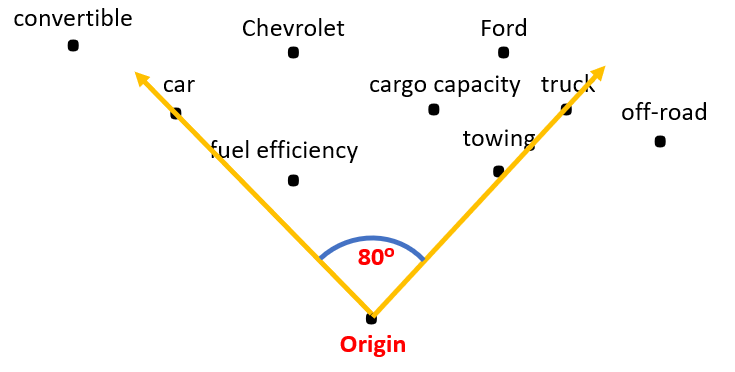

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [9]:
#посмотрим на самые похожие вектора других слов и сравним:
print(model.wv.most_similar(["king"]))
print(                         )
print(model.wv.most_similar(["queen"]))
print(                         )
print(model.wv.most_similar(["princess"]))
print(                         )
print(model.wv.most_similar(["prince"]))

[('prophesy', 0.372498095035553), ('supreme', 0.3379199206829071), ('crush', 0.32690519094467163), ('men', 0.32195737957954407), ('selfsame', 0.31964972615242004), ('stinking', 0.31870901584625244), ('memory', 0.3177676796913147), ('intolerable', 0.3155389130115509), ('godden', 0.3133370876312256), ('proclaimed', 0.31290796399116516)]

[('shrub', 0.31918439269065857), ('pawnd', 0.3169378638267517), ('mildness', 0.30209898948669434), ('thick', 0.2992129921913147), ('lawless', 0.28481218218803406), ('receipt', 0.2845490276813507), ('wilderness', 0.2794898748397827), ('frowning', 0.2770320177078247), ('submission', 0.27157703042030334), ('stranger', 0.26955151557922363)]

[('lookingglass', 0.38875627517700195), ('artificial', 0.3739693760871887), ('inhuman', 0.36273011565208435), ('publicly', 0.3435657024383545), ('disgracious', 0.34136027097702026), ('plant', 0.3231825530529022), ('woe', 0.3138037919998169), ('skill', 0.3069854974746704), ('easier', 0.306728333234787), ('borrowd', 0.3052

1) Посмотрим на слова, похожие на **"короля"**: здесь можно найти и godden, proclaimed, supreme, но при этом и stinking и intolerable. При этом есть и слово "men", на которое король достаточно сильно похож.

2) Среди слов, похожих на **"королеву"** можно отметить mildness, но при этом frowning и lawless

3) Среди слов, похожих на **"принцессу"** можно найти disgracious и inhuman. Вектора слов, имеющих негативную коннотацию в данном случае похожи на вектора слов, близких к королеве.

4) Среди слов, похожих на **"принца"** можно найти affliction. В этом плане по векторам, которые похожи на принца и принцессу, принц и принцесса имеют у Шекспира некий довольно схожий негативный контекст (связанный с некоторым бедствием, которое, возможно, принц и принцесса могут доставить). А также есть и frantic, которое больше похоже на похожие слова у королевы (lawless) и у принцессы (inhuman). В целом, у всех слов, которые мы здесь рассматриваем есть некоторая негативная сторона помимо других, уже носящих более позитивный характер слов.

In [10]:
model.wv.similarity('king', 'queen')

0.009452252

In [12]:
model.wv.similarity('king', 'prince')

0.026320131

In [11]:
model.wv.similarity('queen', 'princess')

0.03415276

In [13]:
model.wv.similarity('prince', 'princess')

0.0813506

In [14]:
model.wv.doesnt_match(['king', 'prince', 'queen', 'princess'])

'king'

Среди данных четырех слов **"король"** является наиболее непохожим на остальные. Самая похожая пара - это **"принц"** и **"принцесса"**, **"королева"** и **"принцесса"** похожи друг на друга больше, чем **"король"** и **"принц"**.

### **Задача 3.** Визуализация

Важный этап подготовки данных к визуализации - сокращение размерности вектора.

Мы обучили вектора размером 100. Теперь нужно превратить их в 2D.

Для этого используют разные алгоритмы, мы воспользуемся PCA (principal component analysis), статистической моделью, которая приводит всю информацию о полученном контенте к виду матрицы меньшей размерности, например, к виду таблицы (двухмерный массив), удобной для построения графиков и эксплораторного анализа данных.

Чтобы понять, как работает PCA, можно почитать [этот блог](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

Создаем функцию для отрисовки графика с помощью PCA.

In [ ]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(6,6))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

Для визуализации давайте посмотрим, какие эпитеты Шекспир использует для описания королей и королев!

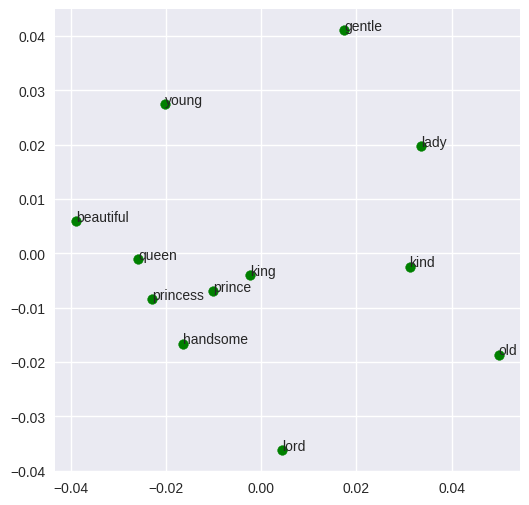

In [ ]:
pca_scatterplot(model, ['handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

Благодаря визуализации и рассмотрению некоторых отдельных прилагательных, которые предположительно употребляются вместе со словами, характеризующими членов королевской семьи, можно выделить некоторые связи:
1) "принц" и "принцесса" имеют наиболее похожие вектора слов, поэтому можно предположить, что они чаще остальных встречаются вместе в общих контекстах.
2) Можно выделить некоторые прилагательные, которые использует Шекспир вместе со словами, описывающеми членов королевской семьи. Например, "handsome", которое находится довольно близко к вектору слов "принц" и "принцесса", а также "beautiful", которое находится ближе к "королеве". А также, если посмотреть на вектора слов, наиболее похожих на эти четыре слова, то можно заметить, что у каждого из четырех среди похожих векторов слов есть также и слова, носящие негативный характер, при чем у каждого эти слова различаются.
